In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read initial files in
# df1 = pd.read_csv("sample_files.txt",sep = ",")
headers = list(pd.read_csv("cols_varscan.txt",sep = "\t").columns)
df1 = pd.read_csv("veryexonic.txt",sep = "\t",names = headers)

In [3]:
# Get list of columns containing "AF"
AF_list = ['AF','AF_afr',
 'AF_sas',
 'AF_amr',
 'AF_eas',
 'AF_nfe',
 'AF_fin',
 'AF_asj',
 'AF_oth']

# Filter data.
df2 = df1[(df1['AF'] != '0') & (df1['AF'] != '.') & (df1['AF_afr'] != '.') & (df1['AF_sas'] != '.') & (df1['AF_amr'] != '.') & (df1['AF_eas'] != '.') & (df1['AF_nfe'] != '.') & (df1['AF_fin'] != '.') & (df1['AF_asj'] != '.') & (df1['AF_oth'] != '.') ]

# Isolate allele frequency data
#data = df2.to_numpy()[:,43:51] # 43 = index of 'AF_afr', 50 = index of AF_oth
#data = data.astype('float')

In [4]:
#extract just af cols
df2 = df2[df2.columns[43:51]]

In [5]:
#remove variants with median over 2.5% 
drop = df2.astype(float).apply(median, axis =1) > 0.025

df2 = df2.drop(drop[drop].index).astype(float)

In [7]:
from scipy.stats import zscore

In [10]:
#Remove if 3 of more zeroes
drop = sum(df2==0, axis =1)>= 3
df2 = df2.drop(drop[drop].index)

In [11]:
#Calculate zscores
#Bias selection of a zscore cutuff 

#check = df2.apply(zscore, axis =1).apply(max)
#sum(check>2.641)
keep_rows = df2.apply(zscore, axis =1).apply(max)>2.6

In [12]:
#keep only rows with high max zscores
df3 = df2.loc[keep_rows[keep_rows].index]

In [13]:
#how many of each ethnicity 
df3.idxmax(axis=1).value_counts()

AF_afr    19393
AF_asj     2396
AF_eas     2274
AF_sas     1179
AF_fin      862
AF_amr      608
AF_nfe       29
AF_oth        5
dtype: int64

In [104]:
#Based on above maybe ill just use the first 6 columns and not include AF_other 

In [14]:
#RE-DO
df2 = df1[(df1['AF'] != '0') & (df1['AF'] != '.') & (df1['AF_afr'] != '.') & (df1['AF_sas'] != '.') & (df1['AF_amr'] != '.') & (df1['AF_eas'] != '.') & (df1['AF_nfe'] != '.') & (df1['AF_fin'] != '.') & (df1['AF_asj'] != '.') & (df1['AF_oth'] != '.') ]

df2 = df2[['AF_afr','AF_nfe' ,'AF_sas', 'AF_amr', 'AF_eas', 'AF_fin', 'AF_asj']].astype(float)

In [17]:
drop = df2.apply(median, axis =1) > 0.025

In [18]:
df2 = df2.drop(drop[drop].index)

In [19]:
drop = sum(df2==0, axis =1)>= 3
df2 = df2.drop(drop[drop].index)

In [20]:
#check = df2.apply(zscore, axis =1).apply(max)
#sum(check>2.23)
keep_rows = df2.apply(zscore, axis =1).apply(max)>2.3

In [21]:
df3 = df2.loc[keep_rows[keep_rows].index]

In [22]:
df3.idxmax(axis=1).value_counts()

AF_afr    24432
AF_asj     6389
AF_eas     3762
AF_nfe     3752
AF_fin     3601
AF_sas     3098
AF_amr     1421
dtype: int64

In [23]:
#select top 1000 from each ethnicity 
array_dic = {}
for ind, eth in enumerate(['AF_afr','AF_nfe' ,'AF_sas', 'AF_amr', 'AF_eas', 'AF_fin', 'AF_asj']):
    keep = df3.idxmax(axis=1)==eth
    test = df3.loc[keep[keep].index].apply(zscore, axis =1).apply(max)
    keep_index = test.sort_values(ascending=False).index[0:1000]
    for i in keep_index: 
        arr1= zeros(7)
        arr1[ind] = 1
        array_dic[i] = arr1
    print(eth)    

AF_afr
AF_nfe
AF_sas
AF_amr
AF_eas
AF_fin
AF_asj


In [24]:
#make new df with only these variants 
#Make column of the arrays of the eth values 
df_new = df1.loc[list(array_dic.keys())]
df_new['Eth_Counts'] = list(array_dic.values())

In [25]:
#Get median 
#['AF_afr','AF_nfe' ,'AF_sas', 'AF_amr', 'AF_eas', 'AF_fin', 'AF_asj']
get_medians = []
for sample in df_new.columns[-667:-1]: 
    test = df_new[sample]!='.'
    sum_array = sum(array(df_new.loc[test[test].index]['Eth_Counts']), axis = 0)
    get_medians.append(sum_array)
    #print(sample, sum_array) 

In [26]:
#Get median normalized count for each sample
make_df = []
for sample in df_new.columns[-667:-1]: 
    test = df_new[sample]!='.'
    norm_array = sum(array(df_new.loc[test[test].index]['Eth_Counts']), axis = 0) - median(vstack(get_medians), axis =0)
    make_df.append(norm_array)
    #print(sample, norm_array) 

In [85]:
#Try to cluster and visualize 
from sklearn.cluster import KMeans

In [126]:
kmeans = KMeans(n_clusters = 6, random_state = 42)
kmeans.fit(vstack(make_df))
prediction = kmeans.fit_predict(vstack(make_df))

In [127]:
for elem in list(where(prediction == 4)[0]):
    print (make_df[elem])

[ -2.  -2.  -2. 146.   0.  -4.   2.]
[ 0. -1. -1. 67. -1.  0.  2.]
[  9.  -4.   0. 107.   4.   1.   0.]
[  1.  -2.  -3. 158.  -1.  -4.   1.]
[  0.  -5.  -1. 124.   0.  -2.   1.]


In [136]:
where(prediction==2)

(array([  6,  15,  39,  50,  77,  89,  98, 108, 111, 112, 114, 117, 127,
        141, 153, 158, 183, 188, 193, 212, 220, 229, 233, 247, 250, 267,
        281, 289, 293, 302, 323, 327, 331, 341, 346, 348, 361, 367, 371,
        393, 398, 400, 420, 443, 463, 483, 487, 496, 537, 543, 545, 556,
        568, 589, 592, 629, 634, 640, 641, 642, 663]),)

In [137]:
make_df[6]

array([ 5., -3., -2., -4.,  0., -1., 41.])

In [138]:
pred_dic = {0:'White', 1:'African', 2:'Jewish', 3:'East Asian', 4:'Latin', 5:'South Asian'}

In [107]:
from sklearn.decomposition import PCA as sklearnPCA

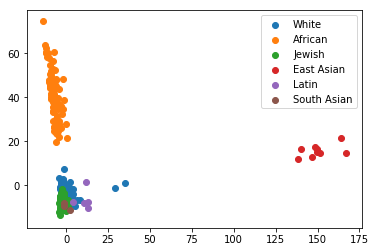

In [139]:
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(vstack(make_df)))
for i in range(6): 
    temp = transformed.loc[where(prediction==i)]
    plt.scatter(temp[0], temp[1], label = pred_dic[i])
    plt.legend()


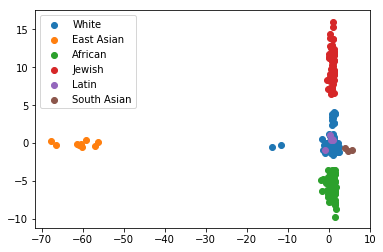

In [264]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=2)
transformed1 = pd.DataFrame(lda.fit_transform(vstack(make_df), prediction))
for i in range(6): 
    temp = transformed1.loc[where(prediction==i)]
    plt.scatter(temp[0], temp[1], label = pred_dic[i])
plt.legend()

In [ ]:
#Try again remove nfe and fin cols 
#['AF_afr','AF_nfe' ,'AF_sas', 'AF_amr', 'AF_eas', 'AF_fin', 'AF_asj']

In [282]:
data = vstack(make_df)
data = delete(data, 1, 1)
data = delete(data, 4,1)

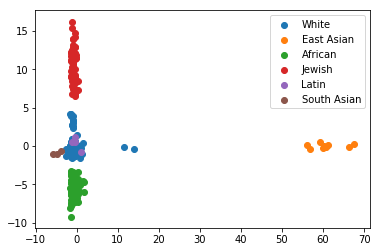

In [283]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=2)
transformed1 = pd.DataFrame(lda.fit_transform(data, prediction))
for i in range(6): 
    temp = transformed1.loc[where(prediction==i)]
    plt.scatter(temp[0], temp[1], label = pred_dic[i])
plt.legend()

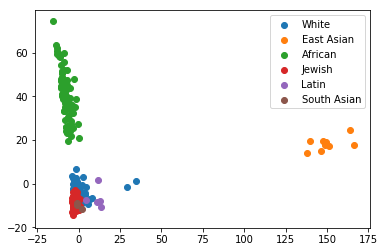

In [284]:
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(data))
for i in range(6): 
    temp = transformed.loc[where(prediction==i)]
    plt.scatter(temp[0], temp[1], label = pred_dic[i])
    plt.legend()

In [385]:
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=3)
transformed1 = pd.DataFrame(lda.fit_transform(data, prediction))

In [386]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [387]:
transformed1['Pred'] = prediction
fig = px.scatter_3d(transformed1, x=0, y=1, z=2,
              color='Pred')
fig.show()

In [383]:
transformed1

,0,1,2,3,Pred
0,-0.514648,0.016765,-2.137610,0.655045,0
1,-1.345104,-5.587139,6.642363,0.907657,2
2,-0.841824,-0.311069,-2.233389,0.964382,0
3,-1.200023,0.973191,-0.860425,0.657571,0
4,-0.470799,0.658072,-1.776311,0.602252,0
5,-0.869553,-0.173584,-1.789780,0.062902,0
6,-0.771912,11.914995,6.012483,0.332304,3
7,-0.119862,-0.514822,-1.931164,0.842114,0
8,-0.835545,-0.501448,-1.907040,0.409067,0
9,-1.247030,-0.623973,-1.719121,0.749931,0
